In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [164]:
df = load_iris()

##### 
Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [165]:
df = pd.DataFrame(df.data)

In [166]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [167]:
X = df.iloc[:, [0, 3]].values

##### Определяем кол-во кластеров

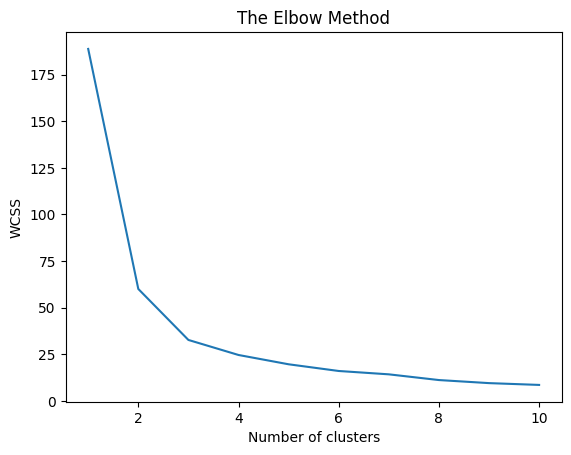

In [168]:
from sklearn.cluster import KMeans
counter = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    counter.append(kmeans.inertia_)
plt.plot(range(1, 11), counter)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [169]:
num_clusters = 3

In [170]:
kmeans = KMeans(n_clusters=num_clusters, n_init=10)

In [171]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [172]:
pred=kmeans.fit_predict(X)

In [173]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

##### Документируем результаты

In [174]:
labels = kmeans.labels_

In [175]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 1 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 2 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


In [176]:
df['cluster'] = pd.Series(labels)

In [177]:
df.head()

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


##### Распределение признаков

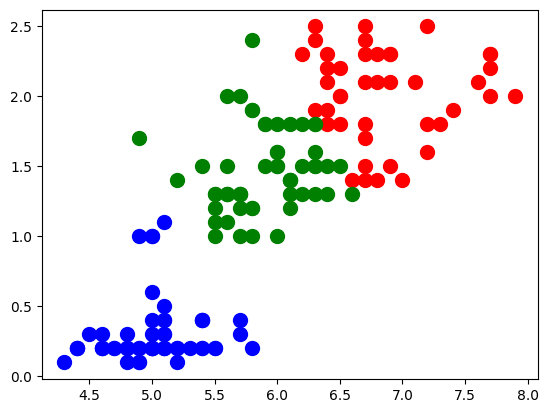

In [178]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.show()

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

##### В качестве моделей обучения, я взял модель StandartScaler, GaussianMixture и DBSCAN

In [180]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
labels_ss = scaler.predict(X_scaled)

AttributeError: 'StandardScaler' object has no attribute 'predict'

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels_gm = gmm.predict(X_scaled)
probs = gmm.predict_proba(X_scaled)

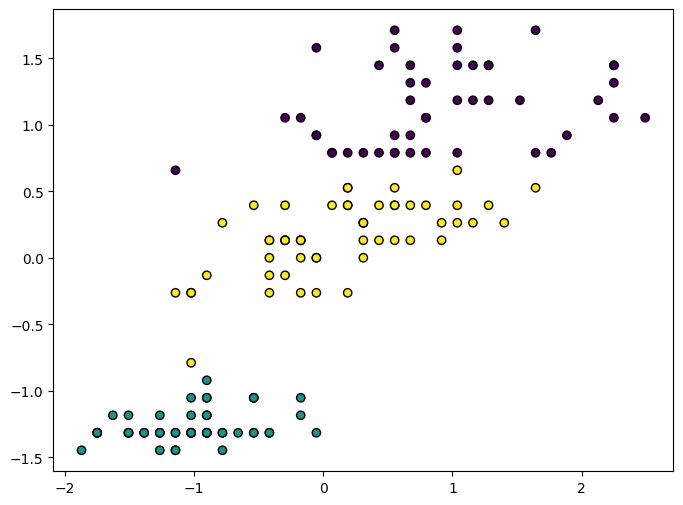

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k')

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Дендрограмма

In [ ]:
D = linkage(X_scaled, 'ward')

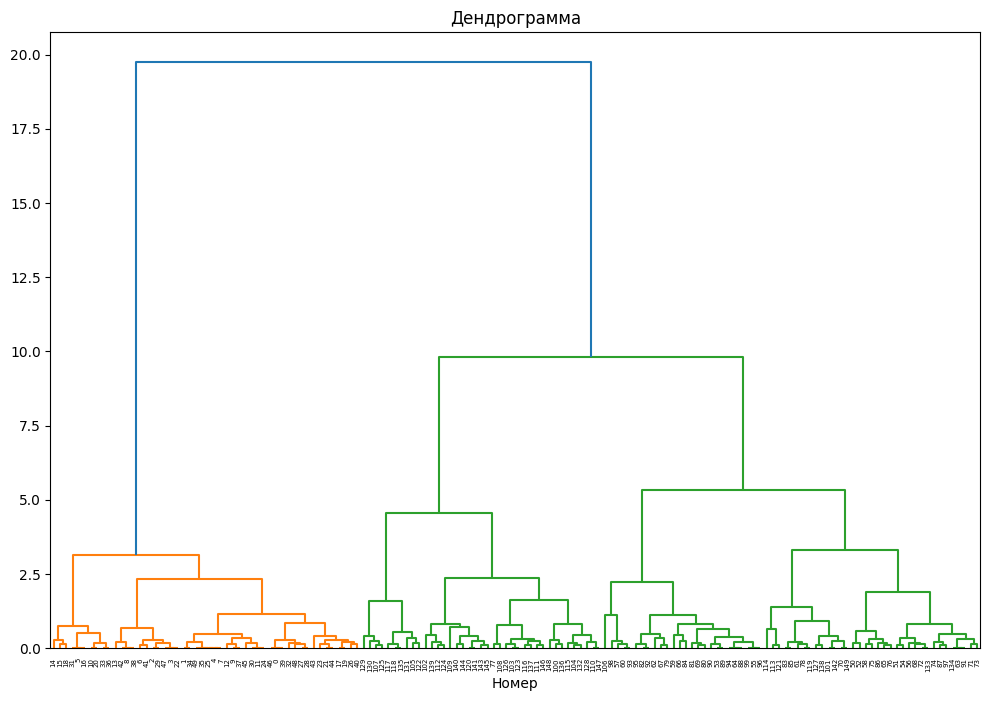

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(D)
plt.title('Дендрограмма')
plt.xlabel('Номер')
plt.show()

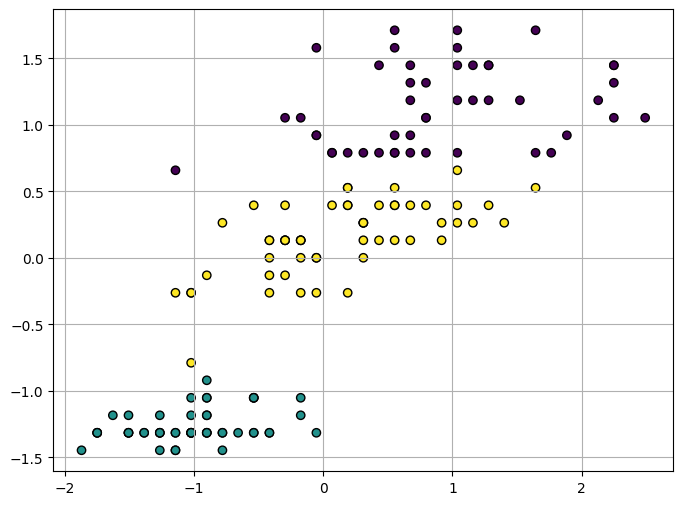

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, rand_score, calinski_harabasz_score, davies_bouldin_score, silhouette_score

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan.fit(X_scaled)
labels = dbscan.labels_

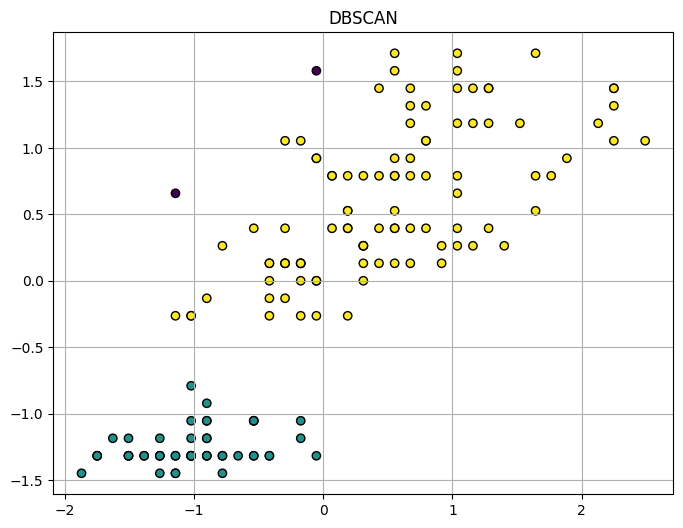

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN')
plt.grid(True)
plt.show()

#### Метрики кластеризации

In [ ]:
print("DBSCAN")
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, labels)))
print("Silhouette_score: " + str(silhouette_score(X, labels)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, labels)))

print("StandartScaler")
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, labels_ss)))
print("Silhouette_score: " + str(silhouette_score(X, labels_ss)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, labels_ss)))

print("GaussianMixture")
print("Calinski_harabasz_score: " + str(calinski_harabasz_score(X, labels_gm)))
print("Silhouette_score: " + str(silhouette_score(X, labels_gm)))
print("Davies_bouldin_score: " + str(davies_bouldin_score(X, labels_gm
                                                          )))

DBSCAN


NameError: name 'calinski_harabasz_score' is not defined

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Кол-во кластеров: {n_clusters}")
print(f"Кол-во шума: {n_noise}")

Кол-во кластеров: 2
Кол-во шума: 2
